# Práctica 8

Integrantes:
- Angel Martinez
- Alejandra Sarria
- Juan Segura

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.optimize import curve_fit

# Diseño de los gráficos
sns.set()
sns.set_context("paper")
sns.set_palette("colorblind")

if not os.path.exists('Practica8_resultados'):
    os.makedirs('Practica8_resultados')

Indice de refraccion vidrio del ajuste polarizacion paralela: 1.63 +/- 0.02
Indice de refraccion vidrio del ajuste polarizacion perpendicular: 1.76 +/- 0.02
El ángulo de Brewster obtenido del ajuste es: 58.47°


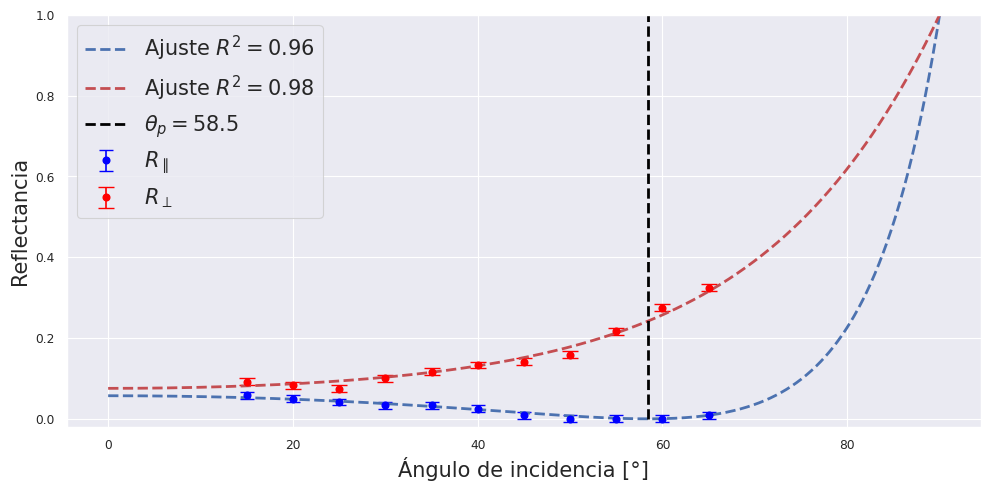

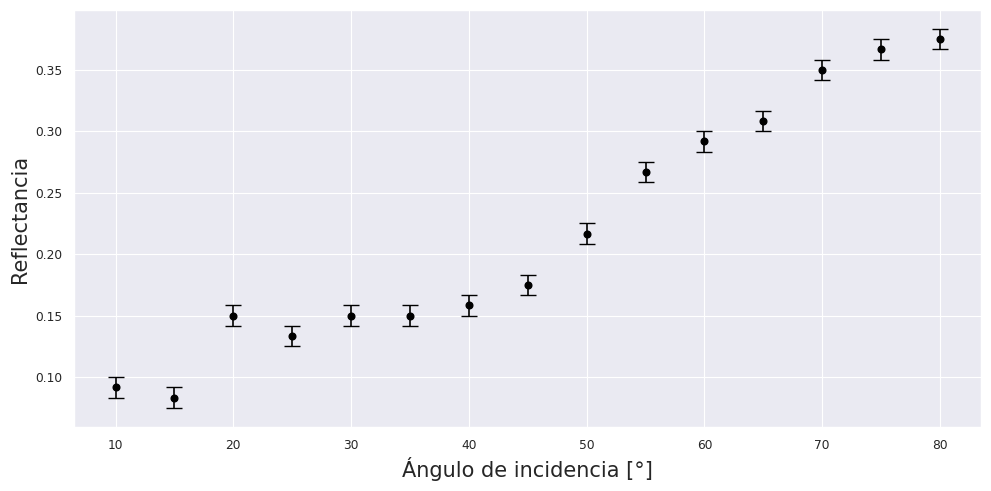

In [ ]:
# Angulo en grados
ang_deg = np.arange(10, 85, 5)

# Irradiancia (lx) luz natural incidente
I_nat = np.array([11, 10, 18, 16, 18, 18, 19, 21, 26, 32, 35, 37, 42, 44, 45])
I_nat = I_nat / 120

# Irradiancia (lx) estado de polarización paralelo, empieza en 15 grados 
I_par = np.array([7, 6, 5, 4, 4, 3, 1, 0, 0, 0, 1, 2, 6])
I_par = I_par / 120

# Irradiancia (lx) estado de polarizacion perpendicular, empieza en 15 grados
I_perp = np.array([11, 10, 9, 12, 14, 16, 17, 19, 26, 33, 39, 39, 38])
I_perp = I_perp / 120

dI = np.ones(len(I_nat)) / 120

# Calculo del R2
def R2(funcion, so_datos, si_datos, par):
    si_ajuste = funcion(so_datos, *par)
    RSS = np.sum((si_datos - si_ajuste)**2)
    TSS = np.sum((si_datos - np.mean(si_datos))**2)
    return 1 - RSS / TSS

def fresnel_parallel(theta, n):
    theta_rad = np.deg2rad(theta)
    sin_theta_t = np.sin(theta_rad) / n
    cos_theta_t = np.sqrt(1 - sin_theta_t**2)

    numerador = n * np.cos(theta_rad) - cos_theta_t
    denominador = n * np.cos(theta_rad) + cos_theta_t

    return (numerador / denominador)**2

def fresnel_perpendicular(theta, n):
    theta_rad = np.deg2rad(theta)
    sin_theta_t = np.sin(theta_rad) / n
    cos_theta_t = np.sqrt(1 - sin_theta_t**2)

    numerador = np.cos(theta_rad) - n * cos_theta_t
    denominador = np.cos(theta_rad) + n * cos_theta_t

    return (numerador / denominador)**2

par, cov = curve_fit(fresnel_parallel, ang_deg[1:-3], I_par[:-2])
n_par = par[0] ; dn_par = np.sqrt(cov[0][0])

# Calculo del R2 para el ajuste de la polarización paralela
r2_par = R2(fresnel_parallel, ang_deg[1:-3], I_par[:-2], (n_par,))

par, cov = curve_fit(fresnel_perpendicular, ang_deg[1:-3], I_perp[:-2])
n_perp = par[0] ; dn_perp = np.sqrt(cov[0][0])

# Calculo del R2 para el ajuste de la polarización perpendicular
r2_perp = R2(fresnel_perpendicular, ang_deg[1:-3], I_perp[:-2], (n_perp,))

ang_lins = np.linspace(0, 90, 1000)
brewster = ang_lins[np.argmin(fresnel_parallel(ang_lins, n_par))]

print(f"Indice de refraccion vidrio del ajuste polarizacion paralela: {n_par:.2f} +/- {dn_par:.2f}")
print(f"Indice de refraccion vidrio del ajuste polarizacion perpendicular: {n_perp:.2f} +/- {dn_perp:.2f}")
print(f"El ángulo de Brewster obtenido del ajuste es: {brewster:.2f}°")

fig, ax = plt.subplots(figsize = (10,5))
ax.errorbar(ang_deg[1:-3], I_par[:-2], yerr= dI[1:-3], fmt='o', color='blue', ecolor='blue', capsize=5, label=r'$R_{\parallel}$')
ax.plot(ang_lins, fresnel_parallel(ang_lins, n_par), 'b--', linewidth=2, label=rf'Ajuste $R^2 = {r2_par:.2f}$')
ax.errorbar(ang_deg[1:-3], I_perp[:-2], yerr= dI[1:-3], fmt='o', color='red', ecolor='red', capsize=6, label=r'$R_{\perp}$')
ax.plot(ang_lins, fresnel_perpendicular(ang_lins, n_perp), 'r--', linewidth=2, label=rf'Ajuste $R^2 = {r2_perp:.2f}$')
ax.vlines(brewster, 0, 1, color='black', linestyle='--', linewidth=2, label=rf'$ \theta_p={brewster:.1f}$°')
ax.set_xlabel('Ángulo de incidencia [°]', fontsize= 15)
ax.set_ylabel('Reflectancia', fontsize= 15)
ax.set_ylim(-0.02, 1)
ax.grid(True)
ax.legend(fontsize= 15, loc='upper left')
fig.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize = (10,5))
ax.errorbar(ang_deg, I_nat, yerr= dI, fmt='o', color='black', ecolor='black', capsize=6)
ax.set_xlabel('Ángulo de incidencia [°]', fontsize= 15)
ax.set_ylabel('Reflectancia', fontsize= 15)
ax.grid(True)
fig.tight_layout()
fig.savefig('Practica8_resultados/Fresnel.pdf', dpi=300)
plt.show()


In [61]:
#
ang = np.arange(0, 370, 10)

I_30 = np.array([1, 2, 3, 4, 5, 5, 6, 5, 4, 4, 3, 2, 1, 0, 0, 0, 0, 1, 2,
              2, 3, 4, 4, 5, 6, 5, 4, 4, 3, 2, 1, 0, 0, 0, 0, 0, 1])

I_70 = np.array([1, 0, 0, 0, 1, 3, 5, 7, 9, 11, 12, 12, 12,
                 11, 10, 7, 5, 3, 1, 0, 0, 0, 1, 3, 4, 7, 10, 11, 12,
                 12, 12, 11, 9, 7, 5, 3, 1])

def graficas(I):
    fig, ax = plt.subplots(figsize = (10,5))
    ax.plot(ang, I)
    ax.grid(True)
    ax.set_xlabel("Ángulo [°]", fontsize=15)
    ax.set_ylabel("Irradiancia [lx]", fontsize=15)

    ang_rad = np.deg2rad(ang)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))
    ax.scatter(ang_rad, I)
    ax.set_theta_zero_location("E")   # 0° sobre eje x
    ax.set_theta_direction(1)        # sentido antihorario
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(loc='upper right', fontsize=15)
    plt.tight_layout()
    plt.show()
    #fig.savefig('Malus_cel_pol.pdf', dpi=300)
    plt.close()

/tmp/ipykernel_59775/3998479135.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize=15)


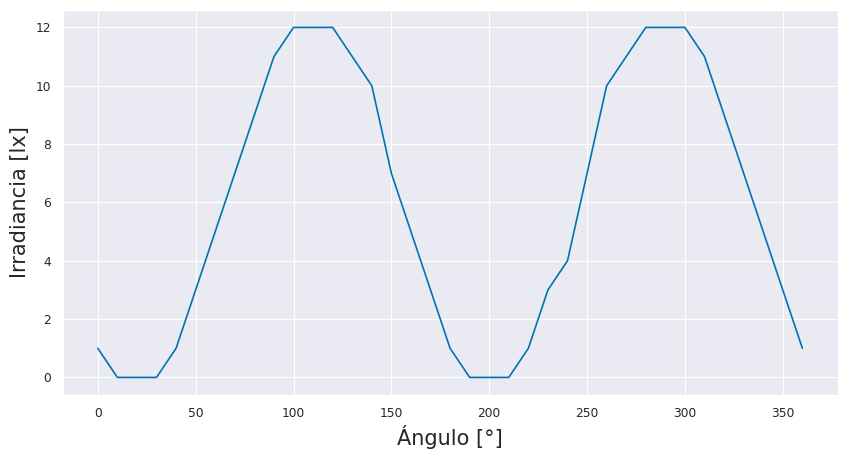

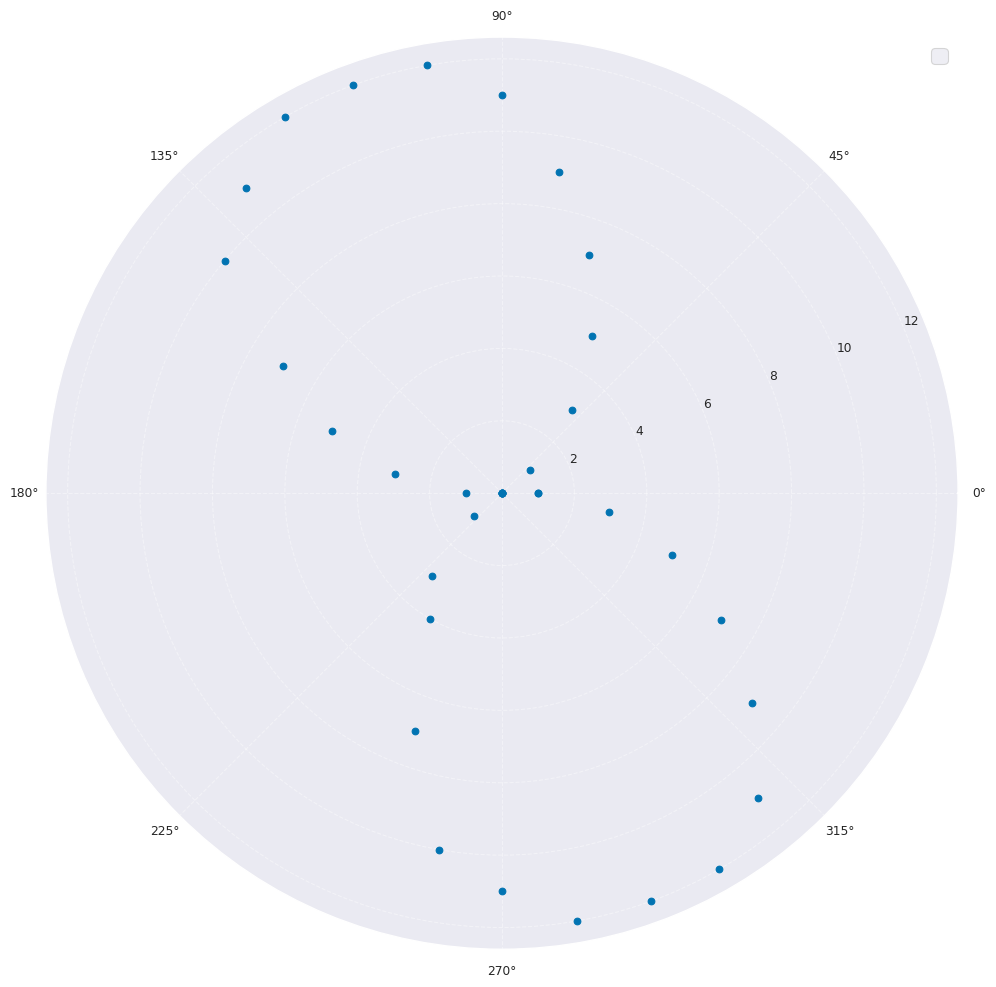

In [63]:
graficas(I_70)

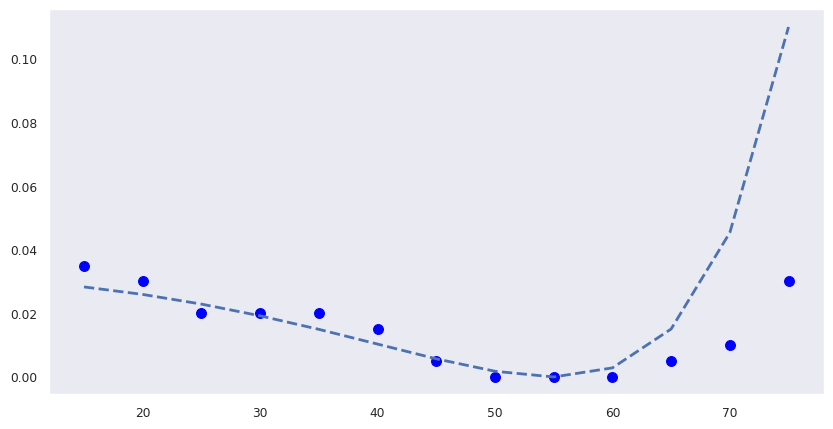

In [54]:
ang = np.linspace(0, 90, 100)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(ang_deg, fresnel_parallel(ang_deg, 1.43), 'b--', linewidth=2, label=f'Ajuste (n={n_par:.3f})')
ax.scatter(ang_deg, I_par, color='blue', s=50, label='Datos experimentales')
plt.grid()
plt.show()

# Maquilladitaaa

399
0.010242550154625826
n_parallel: 1.6847647543260433 +/- 0.04812337838999497
1.6550743269657318


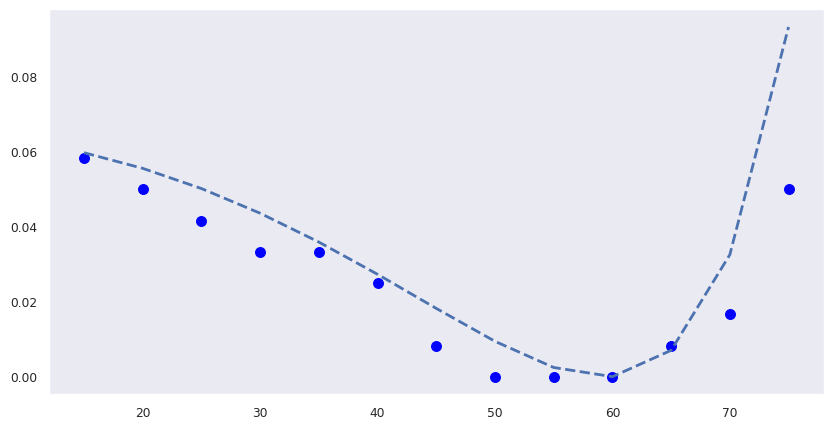

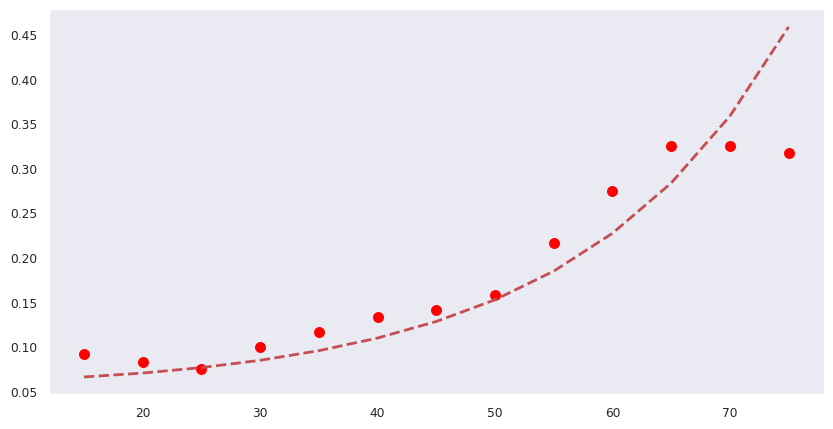

In [89]:
# Angulo en grados
ang_deg = np.arange(15, 80, 5)

# Irradiancia (lx) luz natural incidente
I_nat = np.array([11, 10, 18, 16, 18, 18, 19, 21, 26, 32, 35, 37, 47, 44, 45])

# Irradiancia (lx) estado de polarización paralelo, empieza en 15 grados 
I_par = np.array([7, 6, 5, 4, 4, 3, 1, 0, 0, 0, 1, 2, 6])

# Irradiancia (lx) estado de polarizacion perpendicular, empieza en 15 grados
I_perp = np.array([11, 10, 9, 12, 14, 16, 17, 19, 26, 33, 39, 39, 38])

def fresnel_parallel(theta, n):
    theta_rad = np.deg2rad(theta)
    sin_theta_t = np.sin(theta_rad) / n
    cos_theta_t = np.sqrt(1 - sin_theta_t**2)

    numerador = n * np.cos(theta_rad) - cos_theta_t
    denominador = n * np.cos(theta_rad) + cos_theta_t

    return (numerador / denominador)**2

def fresnel_perpendicular(theta, n):
    theta_rad = np.deg2rad(theta)
    sin_theta_t = np.sin(theta_rad) / n
    cos_theta_t = np.sqrt(1 - sin_theta_t**2)

    numerador = np.cos(theta_rad) - n * cos_theta_t
    denominador = np.cos(theta_rad) + n * cos_theta_t

    return (numerador / denominador)**2

def ajuste(theta, I_par, I_inc):
    I_par = I_par / I_inc

    par, cov = curve_fit(fresnel_parallel, theta, I_par)
    n_par = par[0] ; dn_par = np.sqrt(cov[0][0])

    #print(f"Intensidad {I_inc} \t n: {n_par}")

    return dn_par / n_par

intensidades = np.arange(1, 400)

I_ganadora = 0
err_min = 1_000_000

for i in intensidades:
    err = ajuste(ang_deg, I_par, i)
    if err < err_min:
        err_min = err
        I_ganadora = i

print(I_ganadora)
print(err_min)

I_ganadora = 120

I_par = I_par / I_ganadora
I_perp = I_perp / I_ganadora

par, cov = curve_fit(fresnel_parallel, ang_deg, I_par)
n_par = par[0] ; dn_par = np.sqrt(cov[0][0])

print(f"n_parallel: {n_par} +/- {dn_par}")


par, cov = curve_fit(fresnel_perpendicular, ang_deg, I_perp)
n_perp = par[0] ; dn_perp = np.sqrt(cov[0][0])

print(n_perp)


fig, ax = plt.subplots(figsize = (10,5))
ax.plot(ang_deg, fresnel_parallel(ang_deg, n_par), 'b--', linewidth=2, label=f'Ajuste (n={n_par:.3f})')
ax.scatter(ang_deg, I_par, color='blue', s=50, label='Datos experimentales')
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(ang_deg, fresnel_perpendicular(ang_deg, n_perp), 'r--', linewidth=2, label=f'Ajuste (n={n_perp:.3f})')
ax.scatter(ang_deg, I_perp, color='red', s=50, label='Datos experimentales')
ax.grid(True)
plt.grid()
plt.show()

In [82]:
print(np.tan(np.deg2rad(60)))

1.7320508075688767


In [86]:
print(np.deg2rad(55))

0.9599310885968813
